<a href="https://colab.research.google.com/github/Baal-Pyre/pokedex/blob/master/Copy_of_Copy_of_Pokediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

! pip install category_encoders
import category_encoders as ce


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import subplots


In [3]:

data=pd.read_csv(r'/content/datasets_2756_4568_pokemon.csv')
df=pd.DataFrame(data)
df


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,Tekkaguyaテッカグヤ,Celesteela,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,Kamiturugiカミツルギ,Kartana,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,Akuzikingアクジキング,Guzzlord,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,Necrozmaネクロズマ,Necrozma,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [4]:

def TheAlchemist(x):
  x=x.copy()
  x['type2'].fillna(x['type1'],inplace=True)

  x['attack']=x['attack']/10
  x['attack']=x['attack'].round()
  x['sp_attack']=x['sp_attack']/10
  x['sp_attack']=x['sp_attack'].round()
  x['defense']=x['defense']/10
  x['defense']=x['defense'].round()
  x['sp_defense']=x['sp_defense']/10
  x['sp_defense']=x['sp_defense'].round()
  x['speed']=x['speed']/10
  x['speed']=x['speed'].round()
  x['hp']=x['hp']/10
  x['hp']=x['hp'].round()
  x['weight']=x['weight_kg']
  x['weight']=x['weight'].round()
  x['weight']=x['weight']/10
  x.drop('weight_kg',axis=1,inplace=True)
  x['height']=x['height_m']
  x['height']=x['height'].round()
  x['height']=x['height']/10
  x.drop('height_m',axis=1,inplace=True)
  x['abilities']=x['abilities'].str.replace('[','')
  x['abilities']=x['abilities'].str.replace(']','')
  x['abilities']=x['abilities'].str.replace("'",'')
  x['abilities']=x['abilities'].str.replace(",",'')
  var=x['abilities'].str.split(" ",n=1,expand=True)
  x["ability_1"]=var[0]
  x["ability_2"]=var[1]
  x['ability_2'].fillna(x['ability_1'],inplace=True)
  x.drop(columns=["abilities"],inplace=True)

  stats=['attack','sp_attack','defense','sp_defense','speed','hp']
  x.drop(stats,axis=1,inplace=True)

  bodytype=['weight','height','classfication']
  x.drop(bodytype,axis=1,inplace=True)

  lifecycle=['base_happiness','experience_growth','base_happiness','capture_rate','percentage_male','base_egg_steps']
  x.drop(lifecycle,axis=1,inplace=True)

  against=['against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight','against_fire','against_flying','against_ghost','against_grass','against_ground','against_ice','against_normal','against_poison','against_psychic','against_rock','against_steel','against_water']
  # x.drop(against,axis=1,inplace=True)

  bunk=['pokedex_number','japanese_name','is_legendary','name']
  x.drop(bunk,axis=1,inplace=True)

  return x


In [5]:

df=TheAlchemist(df)
df


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,base_total,type1,type2,generation,ability_1,ability_2
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,318,grass,poison,1,Overgrow,Chlorophyll
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,405,grass,poison,1,Overgrow,Chlorophyll
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,625,grass,poison,1,Overgrow,Chlorophyll
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,309,fire,fire,1,Blaze,Solar Power
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,405,fire,fire,1,Blaze,Solar Power
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,570,steel,flying,7,Beast,Boost
797,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,570,grass,steel,7,Beast,Boost
798,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,570,dark,dragon,7,Beast,Boost
799,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,600,psychic,psychic,7,Prism,Armor


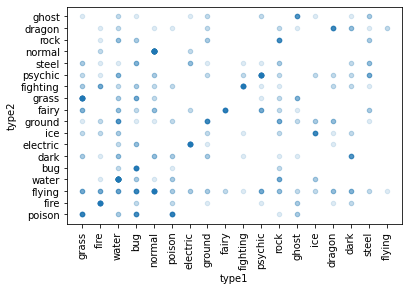

In [6]:

plot=df.plot.scatter(x='type1',y='type2',rot=0,alpha=.145)
plt.xticks(rotation=90)
plot


In [7]:

train=df[df['generation']<7]
test=df[df['generation']==7]


In [8]:

target1=df[['type1']]
target2=df[['type2']]
target1=target1.select_dtypes(exclude='number').nunique().index.tolist()
target2=target2.select_dtypes(exclude='number').nunique().index.tolist()

features=df.drop(columns=['type1','type2'])
numeric=features.select_dtypes(include='number').columns.tolist()
categorical=features.select_dtypes(exclude='number').nunique().index.tolist()
features=numeric+categorical


In [9]:

xtrain=train[features]
ytrain=train[target1]
ztrain=train[target2]

xtest=test[features]
ytest=test[target1]
ztest=test[target2]


In [10]:

pipe1=make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    RandomForestClassifier())
pipe1=pipe1.fit(xtrain,ytrain)
print(pipe1.score(xtest,ytest))

pipe2=make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    RandomForestClassifier())
pipe2=pipe2.fit(xtrain,ztrain)
print(pipe2.score(xtest,ztest))




/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


0.85


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


0.8375


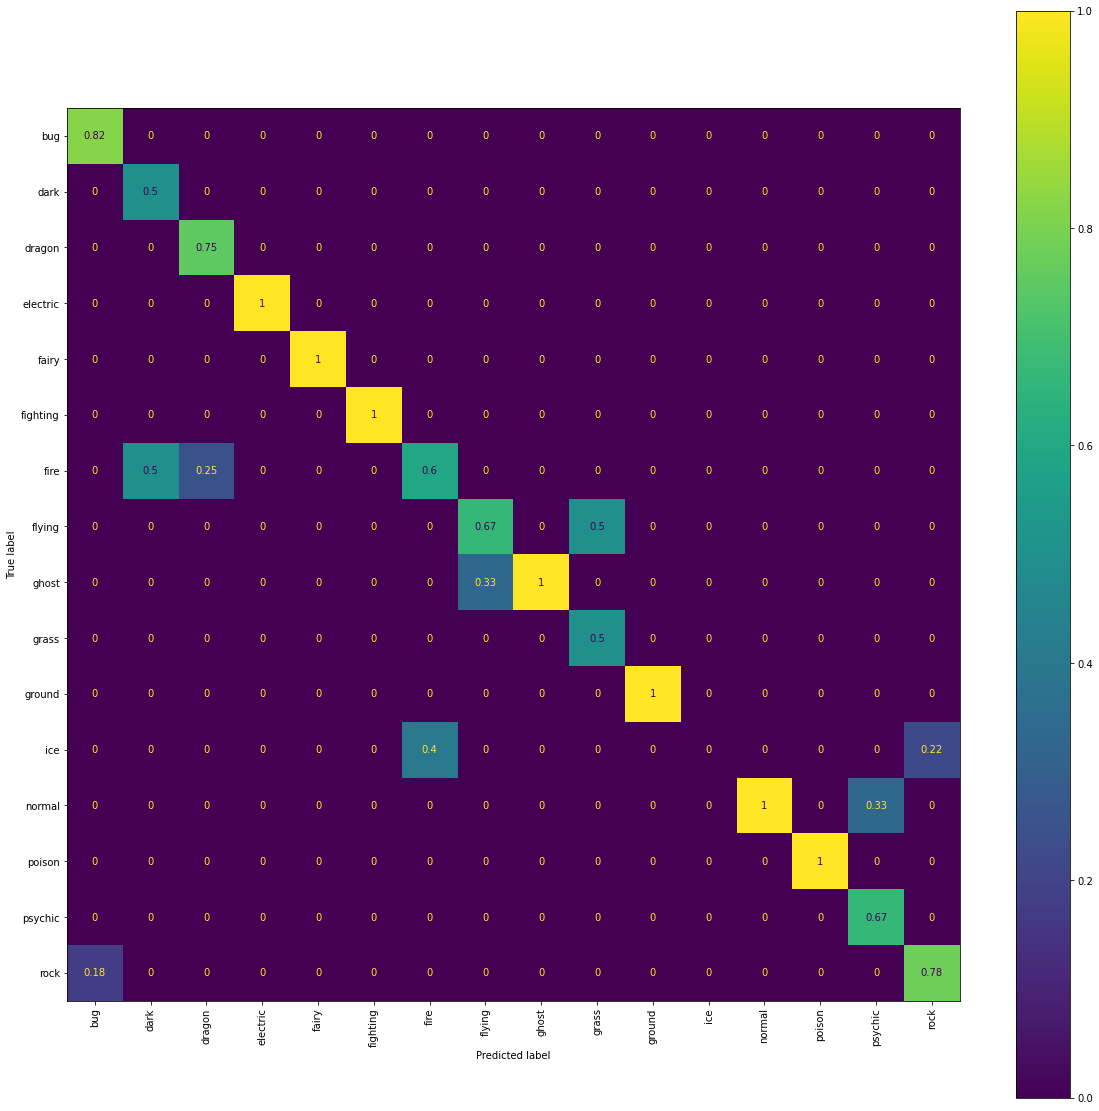

In [11]:

fig,ax = plt.subplots(figsize=(20, 20))

plot_confusion_matrix(pipe1,
                      xtest,
                      ytest,
                      normalize='pred',
                      xticks_rotation='vertical',
                      ax=ax)


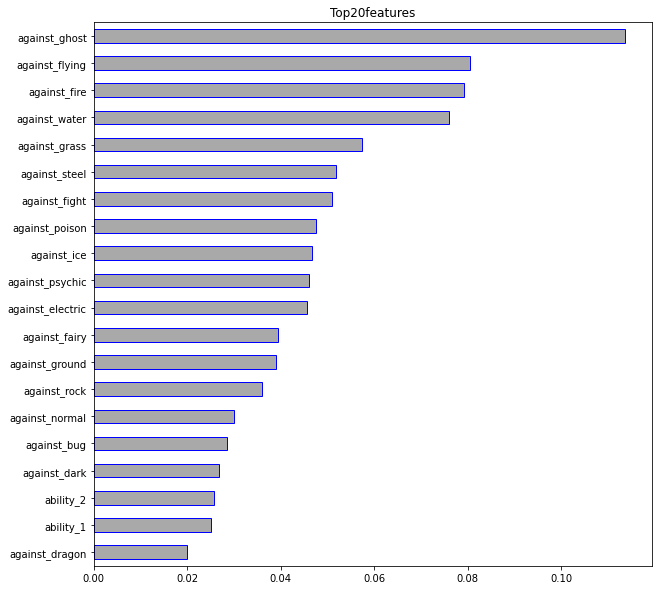

In [12]:

%matplotlib inline

rf=pipe1.named_steps['randomforestclassifier']
importances=pd.Series(rf.feature_importances_,xtrain.columns)

n=20
plt.figure(figsize=(10,n/2))
plt.title(f'Top{n}features')
importances.sort_values()[-n:].plot.barh(color='darkgrey',edgecolor='blue');



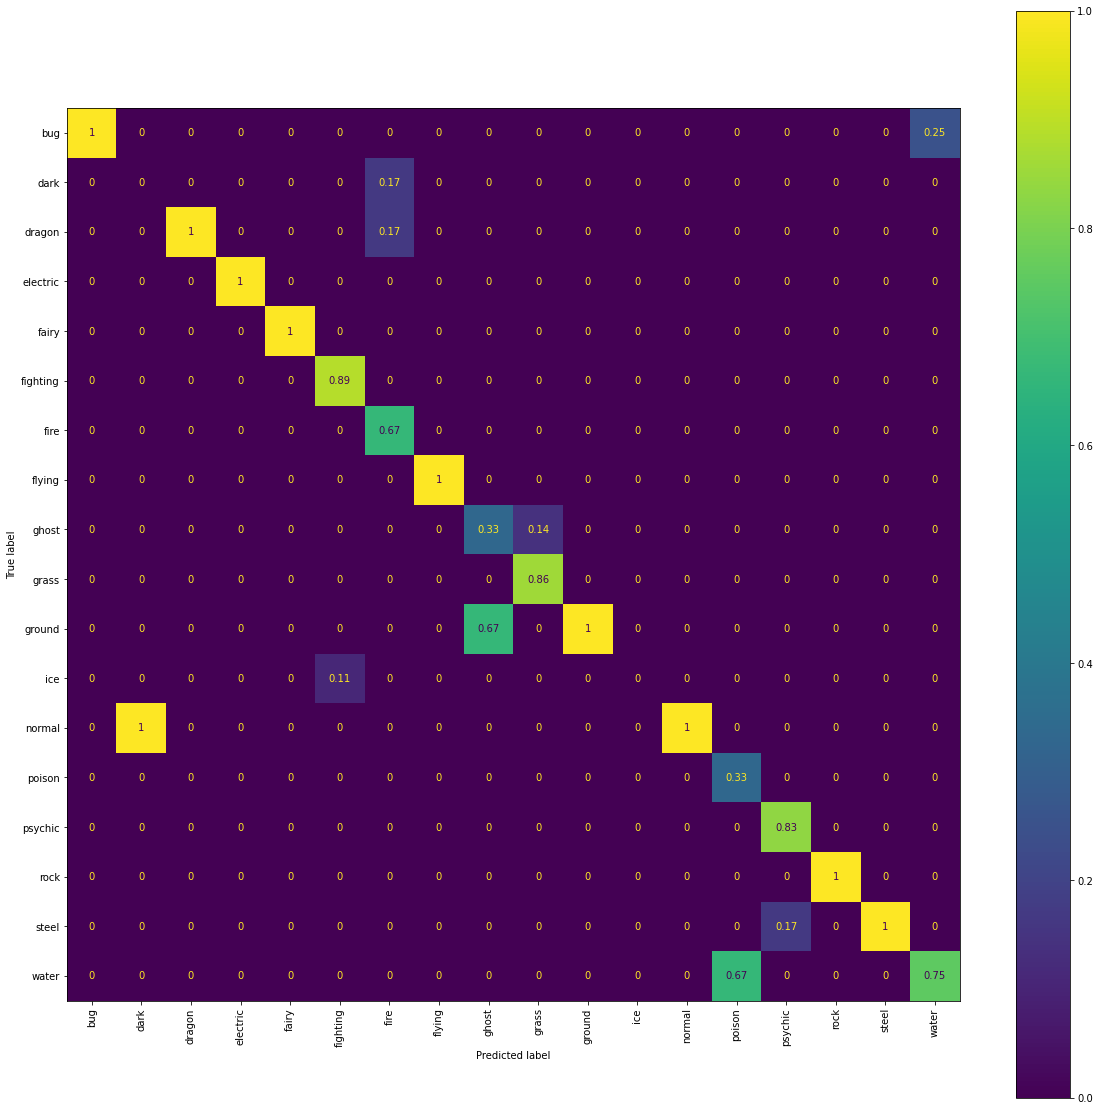

In [13]:


fig, ax = plt.subplots(figsize=(20, 20))

plot_confusion_matrix(pipe2,
                      xtest,
                      ztest,
                      normalize='pred',
                      xticks_rotation='vertical',
                      ax=ax)


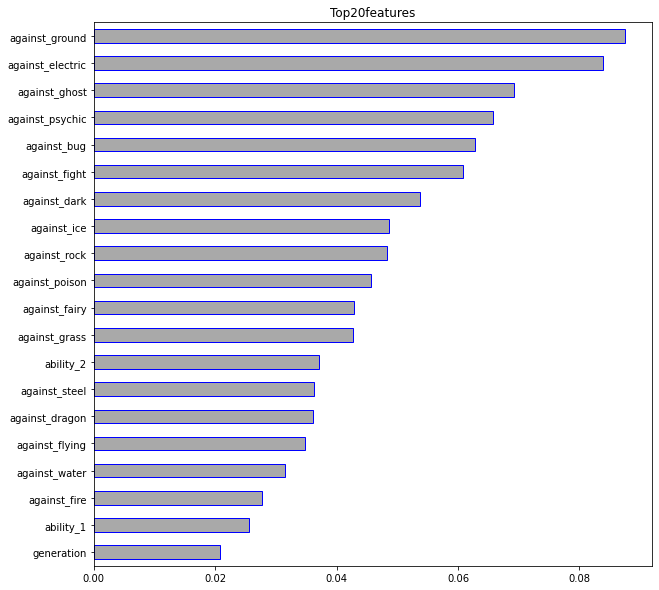

In [14]:

sg=pipe2.named_steps['randomforestclassifier']
importances=pd.Series(sg.feature_importances_,xtrain.columns)

n=20
plt.figure(figsize=(10,n/2))
plt.title(f'Top{n}features')
importances.sort_values()[-n:].plot.barh(color='darkgrey',edgecolor='blue');


In [15]:

def thesnakeoilsalesman(x):
  x=x.copy()
  x['type']=x['type1']+', '+x['type2']
  x.drop('type1',axis=1,inplace=True)
  x.drop('type2',axis=1,inplace=True)
  return x


In [16]:

df=thesnakeoilsalesman(df)

df


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,base_total,generation,ability_1,ability_2,type
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,318,1,Overgrow,Chlorophyll,"grass, poison"
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,405,1,Overgrow,Chlorophyll,"grass, poison"
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,625,1,Overgrow,Chlorophyll,"grass, poison"
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,309,1,Blaze,Solar Power,"fire, fire"
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,405,1,Blaze,Solar Power,"fire, fire"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,570,7,Beast,Boost,"steel, flying"
797,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,570,7,Beast,Boost,"grass, steel"
798,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,570,7,Beast,Boost,"dark, dragon"
799,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,600,7,Prism,Armor,"psychic, psychic"


In [17]:

target=df['type']
target


0         grass, poison
1         grass, poison
2         grass, poison
3            fire, fire
4            fire, fire
             ...       
796       steel, flying
797        grass, steel
798        dark, dragon
799    psychic, psychic
800        steel, fairy
Name: type, Length: 801, dtype: object

In [18]:

train=df[df['generation']<7]
test=df[df['generation']==7]


In [19]:

qtrain=train['type']
qtest=test['type']


In [20]:

pipe0=make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(),
    StandardScaler(),
    LinearSVC()) 

pipe0=pipe0.fit(xtrain,qtrain)
ypred=pipe0.predict(xtest)
print(pipe0.score(xtest,qtest))
MultiOutputClassifier

print(accuracy_score(qtest,ypred))
print(precision_score(qtest,ypred,average='weighted'))


0.5875


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


sklearn.multioutput.MultiOutputClassifier

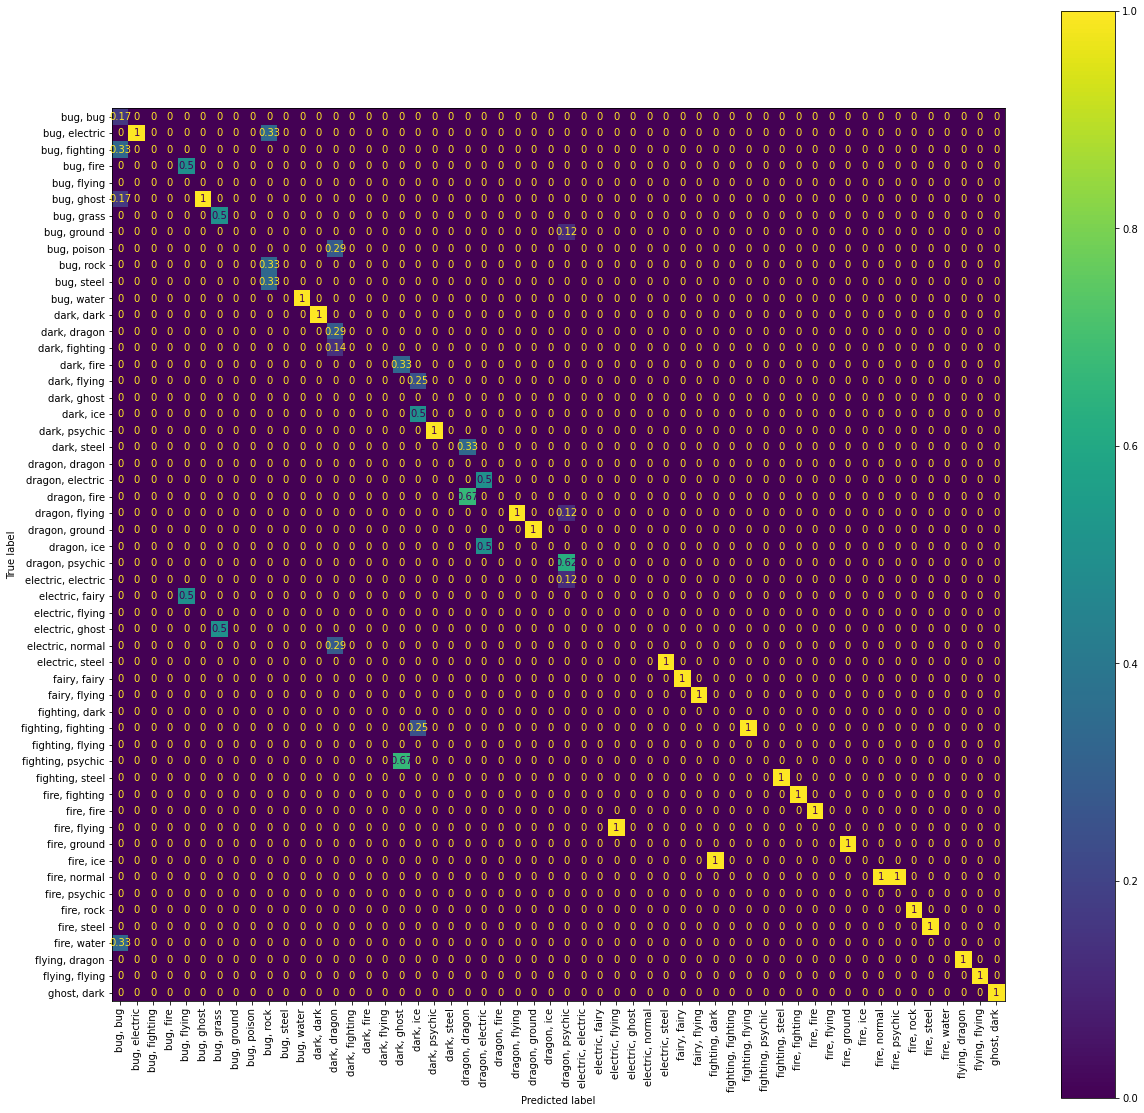

In [21]:

fig,ax=plt.subplots(figsize=(20, 20))

plot_confusion_matrix(pipe0,
                      xtest,
                      qtest,
                      normalize='pred',
                      xticks_rotation='vertical',
                      ax=ax)
